In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
log_reg = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Train classifiers
log_reg.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
dtree.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_dtree = dtree.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Calculate evaluation metrics
metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_log_reg),
        'Precision': precision_score(y_test, y_pred_log_reg),
        'Recall': recall_score(y_test, y_pred_log_reg),
        'F1 Score': f1_score(y_test, y_pred_log_reg),
    },
    'K-Nearest Neighbors': {
        'Accuracy': accuracy_score(y_test, y_pred_knn),
        'Precision': precision_score(y_test, y_pred_knn),
        'Recall': recall_score(y_test, y_pred_knn),
        'F1 Score': f1_score(y_test, y_pred_knn),
    },
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, y_pred_dtree),
        'Precision': precision_score(y_test, y_pred_dtree),
        'Recall': recall_score(y_test, y_pred_dtree),
        'F1 Score': f1_score(y_test, y_pred_dtree),
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision': precision_score(y_test, y_pred_rf),
        'Recall': recall_score(y_test, y_pred_rf),
        'F1 Score': f1_score(y_test, y_pred_rf),
    }
}

# Create a DataFrame for the results
results_df = pd.DataFrame(metrics)

# Format the DataFrame
results_df = results_df.applymap(lambda x: round(x, 2))

# Display the formatted results
print("Classifier Evaluation Metrics:(Test Data)")
print(results_df)

Classifier Evaluation Metrics:(Test Data)
           Logistic Regression  K-Nearest Neighbors  Decision Tree  \
Accuracy                  0.75                 0.69           0.73   
Precision                 0.65                 0.58           0.61   
Recall                    0.67                 0.51           0.73   
F1 Score                  0.66                 0.54           0.66   

           Random Forest  
Accuracy            0.75  
Precision           0.65  
Recall              0.65  
F1 Score            0.65  


C:\Users\padwa\AppData\Local\Temp\ipykernel_12384\2163392409.py:63: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df = results_df.applymap(lambda x: round(x, 2))


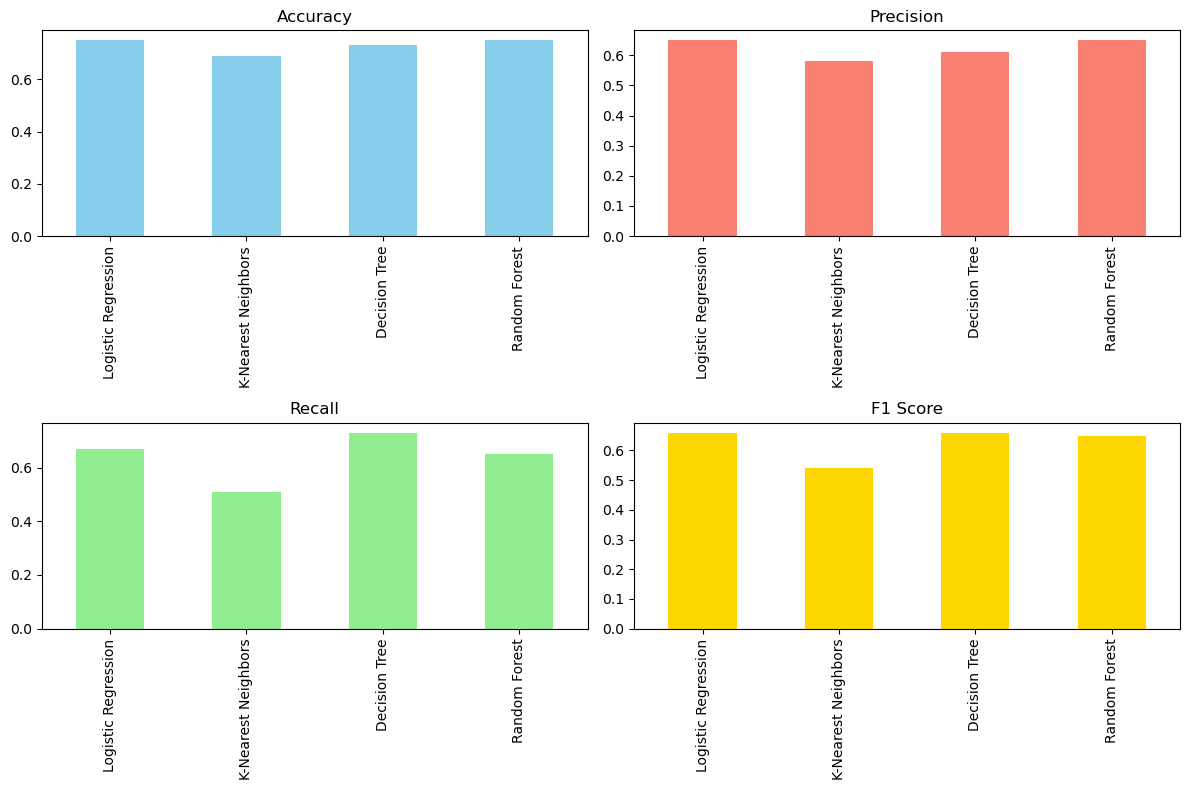

In [9]:
import matplotlib.pyplot as plt

# Plot evaluation metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot accuracy
results_df.loc['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Accuracy')

# Plot precision
results_df.loc['Precision'].plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Precision')

# Plot recall
results_df.loc['Recall'].plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Recall')

# Plot F1 score
results_df.loc['F1 Score'].plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('F1 Score')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Training DataSet

In [10]:
# Make predictions on the training set
y_train_pred_log_reg = log_reg.predict(X_train_scaled)
y_train_pred_knn = knn.predict(X_train_scaled)
y_train_pred_dtree = dtree.predict(X_train_scaled)
y_train_pred_rf = rf.predict(X_train_scaled)

# Calculate evaluation metrics for training data
train_metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_train, y_train_pred_log_reg),
        'Precision': precision_score(y_train, y_train_pred_log_reg),
        'Recall': recall_score(y_train, y_train_pred_log_reg),
        'F1 Score': f1_score(y_train, y_train_pred_log_reg),
    },
    'K-Nearest Neighbors': {
        'Accuracy': accuracy_score(y_train, y_train_pred_knn),
        'Precision': precision_score(y_train, y_train_pred_knn),
        'Recall': recall_score(y_train, y_train_pred_knn),
        'F1 Score': f1_score(y_train, y_train_pred_knn),
    },
    'Decision Tree': {
        'Accuracy': accuracy_score(y_train, y_train_pred_dtree),
        'Precision': precision_score(y_train, y_train_pred_dtree),
        'Recall': recall_score(y_train, y_train_pred_dtree),
        'F1 Score': f1_score(y_train, y_train_pred_dtree),
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_train, y_train_pred_rf),
        'Precision': precision_score(y_train, y_train_pred_rf),
        'Recall': recall_score(y_train, y_train_pred_rf),
        'F1 Score': f1_score(y_train, y_train_pred_rf),
    }
}

# Create a DataFrame for the results
train_results_df = pd.DataFrame(train_metrics)

# Format the DataFrame
train_results_df = train_results_df.applymap(lambda x: round(x, 2))

# Display the formatted results for training data
print("Classifier Evaluation Metrics (Train Data):")
print(train_results_df)

Classifier Evaluation Metrics (Train Data):
           Logistic Regression  K-Nearest Neighbors  Decision Tree  \
Accuracy                  0.77                 0.82            1.0   
Precision                 0.72                 0.80            1.0   
Recall                    0.56                 0.66            1.0   
F1 Score                  0.63                 0.72            1.0   

           Random Forest  
Accuracy             1.0  
Precision            1.0  
Recall               1.0  
F1 Score             1.0  


C:\Users\padwa\AppData\Local\Temp\ipykernel_12384\2227561033.py:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_results_df = train_results_df.applymap(lambda x: round(x, 2))


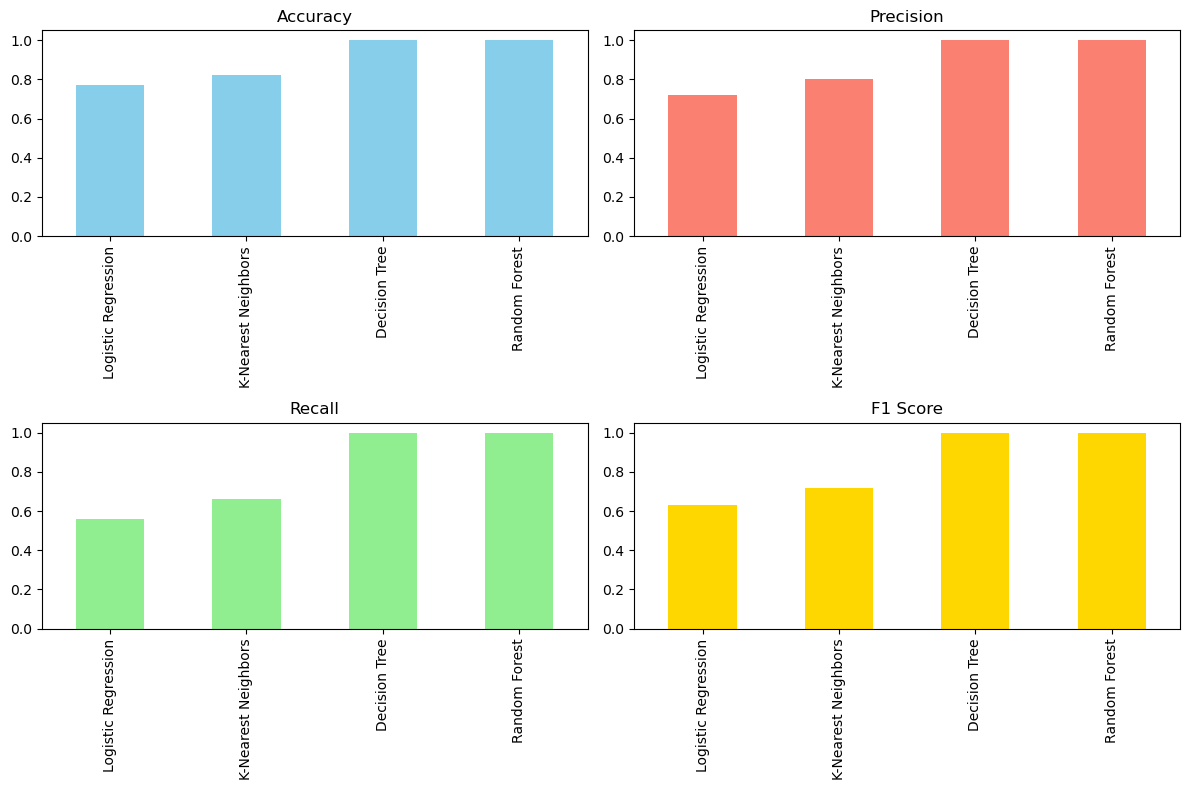

In [11]:
import matplotlib.pyplot as plt

# Plot evaluation metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot accuracy
train_results_df.loc['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Accuracy')

# Plot precision
train_results_df.loc['Precision'].plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Precision')

# Plot recall
train_results_df.loc['Recall'].plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Recall')

# Plot F1 score
train_results_df.loc['F1 Score'].plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('F1 Score')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [12]:
import pickle
pickle_out=open("log_reg_model.pkl","wb")
pickle.dump(log_reg,pickle_out)
pickle_out.close()

import pickle
pickle_out=open("dtree_model.pkl","wb")
pickle.dump(dtree,pickle_out)
pickle_out.close()

import pickle
pickle_out=open("knn_model.pkl","wb")
pickle.dump(knn,pickle_out)
pickle_out.close()

import pickle
pickle_out=open("rf_model.pkl","wb")
pickle.dump(rf,pickle_out)
pickle_out.close()